<a href="https://colab.research.google.com/github/AnushangaWimalasena/Movie-Review-Classification-Using-LSTM/blob/main/Movie_Review_Classifications_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Load Data***

In [ ]:
!pip install unidecode
!pip install word2number
!pip install contractions

!pip install spacy --user
# !python -m spacy download en_core_web_sm      #for small
# !python -m spacy download en_core_web_md      #for medium  
# !python -m spacy download en_core_web_lg 

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/IS/IMDB Dataset.csv", encoding="latin1")

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

# ***Preprosessing***

In [ ]:
from bs4 import BeautifulSoup
import spacy
import unidecode
from word2number import w2n
import contractions
import string

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
sw_nltk.remove('not')
sw_nltk.remove('no')

from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

import re
# load spacy model, can be "en_core_web_sm" as well
# nlp = spacy.load('en_core_web_md')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text


def remove_whitespace(text):
    text = text.strip()
    return " ".join(text.split())

def remove_accented_chars(text):
    text = unidecode.unidecode(text)
    return text

def expand_contractions(text):
    text = contractions.fix(text)
    return text

def remove_urls(text):
	url_pattern = r'https?://\S+|www\.\S+'
	without_urls = re.sub(pattern=url_pattern, repl=' ', string=text)
	return without_urls

def remove_numbers(text):
	number_pattern = r'\d+'
	without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
	return without_number

def word_lemmatizer(text):
  sentence_words = nltk.word_tokenize(text)

  final_txt = []
  for word in sentence_words:
    word = word.lower()
    final_txt.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
  
  return final_txt

def remove_stopwords(text):
  words = [word for word in text.split() if word.lower() not in sw_nltk]
  new_text = " ".join(words)
  return new_text


def remove_punctuations(text):
  exclist = string.punctuation + string.digits
  # remove punctuations and digits from oldtext
  table_ = str.maketrans('', '', exclist)
  newtext = text.translate(table_)
  return newtext

def text_preprocessing(text):
  text = strip_html_tags(text)
  text = remove_urls(text)
  text = remove_accented_chars(text)
  text = expand_contractions(text)
  text = remove_punctuations(text)
  text = remove_stopwords(text)
  text = word_lemmatizer(text)

  return text

In [ ]:
from sklearn.model_selection import train_test_split 

data['review'] = data['review'].apply(text_preprocessing)

In [ ]:
x_data = data['review']
y_data = data['sentiment']
y_data = y_data.replace('positive', 1)
y_data = y_data.replace('negative', 0)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

In [ ]:
import numpy as np

def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

token = Tokenizer(lower=False)    # no need lower, because already lowered 
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[    1   144  3379 ...  8019  1889   268]
 [57000  1699  1509 ...     0     0     0]
 [  194     2  1545 ...     0     0     0]
 ...
 [  289     3    35 ...     0     0     0]
 [   48     7   654 ...     0     0     0]
 [ 4728    44   638 ...     0     0     0]] 

Encoded X Test
 [[   34  8465 13290 ...     0     0     0]
 [  476  4312  4702 ...     0     0     0]
 [  155    40  1068 ...    11   403  1514]
 ...
 [  885     4   256 ...     0     0     0]
 [    2   264   371 ...     0     0     0]
 [  954    18   168 ... 13310   360    24]] 

Maximum review length:  120


# ***LSTM Model***

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, LSTM, Dense

EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(LSTM(LSTM_OUT))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 32)           4203584   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 4,228,481
Trainable params: 4,228,481
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'models/LSTM.h5',
    monitor='accuracy',
    save_best_only=True,
    verbose=2
)

In [ ]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose=2, callbacks=[checkpoint])

Epoch 1/10
313/313 - 60s - loss: 0.4735 - accuracy: 0.7514

Epoch 00001: accuracy improved from -inf to 0.75140, saving model to models/LSTM.h5
Epoch 2/10
313/313 - 57s - loss: 0.2185 - accuracy: 0.9217

Epoch 00002: accuracy improved from 0.75140 to 0.92170, saving model to models/LSTM.h5
Epoch 3/10
313/313 - 57s - loss: 0.1266 - accuracy: 0.9602

Epoch 00003: accuracy improved from 0.92170 to 0.96017, saving model to models/LSTM.h5
Epoch 4/10
313/313 - 55s - loss: 0.0772 - accuracy: 0.9769

Epoch 00004: accuracy improved from 0.96017 to 0.97695, saving model to models/LSTM.h5
Epoch 5/10
313/313 - 55s - loss: 0.0546 - accuracy: 0.9840

Epoch 00005: accuracy improved from 0.97695 to 0.98403, saving model to models/LSTM.h5
Epoch 6/10
313/313 - 56s - loss: 0.0384 - accuracy: 0.9898

Epoch 00006: accuracy improved from 0.98403 to 0.98985, saving model to models/LSTM.h5
Epoch 7/10
313/313 - 55s - loss: 0.0419 - accuracy: 0.9889

Epoch 00007: accuracy did not improve from 0.98985
Epoch 8/10

# ***Testing***

In [ ]:
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

79/79 [==============================] - 4s 48ms/step - loss: 0.7232 - accuracy: 0.8547
test loss, test acc: [0.7231782078742981, 0.8547000288963318]


In [ ]:
pred = model.predict(x=x_test)
y_pred = (pred >= 0.7) * 1
y_pred

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

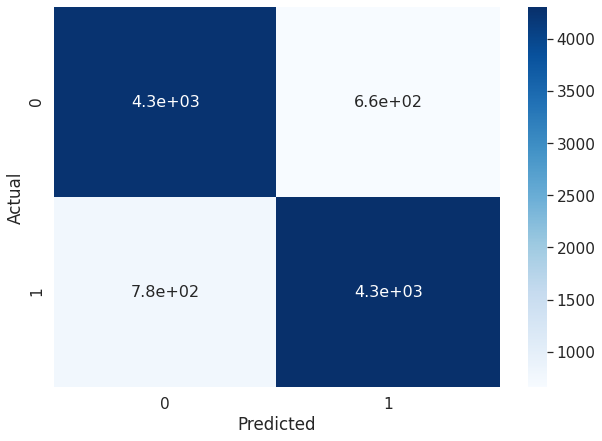

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


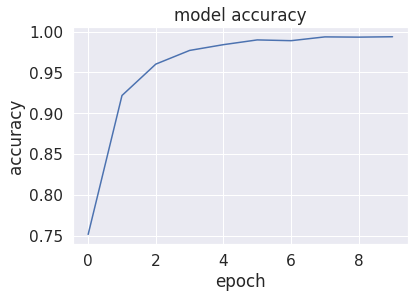

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

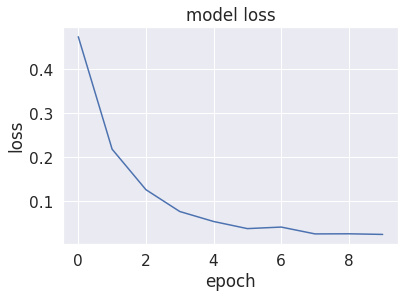

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4917
           1       0.87      0.85      0.86      5083

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# ***Custom Movie Review***

In [ ]:
cus_rev = pd.read_csv('/content/custom reviews.csv')

In [ ]:
cus_rev.head()

,review,sentiment
0,"excellent work by the whole cast and crew,and ...",positive
1,"For me, enjoying a movie can be achieved by pr...",negative
2,The only thing I can write as an average Joe w...,positive
3,Second-hand embarrassment at its finest. Even ...,negative
4,This movie is one of the greatest of all time....,positive


In [ ]:
cus_rev['review'] = cus_rev['review'].apply(text_preprocessing)

In [ ]:
cus_rev.head()

,review,sentiment
0,"[excellent, work, whole, cast, crewand, always...",positive
1,"[enjoy, movie, achieve, properly, manage, expe...",negative
2,"[thing, write, average, joe, watch, movies, si...",positive
3,"[secondhand, embarrassment, finest, even, pers...",negative
4,"[movie, one, greatest, time, adapt, book, chuc...",positive


In [ ]:
x_data_c = cus_rev['review']
y_data_c = cus_rev['sentiment']
y_data_c = y_data_c.replace('positive', 1)
y_data_c = y_data_c.replace('negative', 0)

In [ ]:
x_tc = token.texts_to_sequences(x_data_c)
x_tc = pad_sequences(x_tc, maxlen=max_length, padding='post', truncating='post')

In [ ]:
x_tc

In [ ]:
results_c = model.evaluate(x_tc, y_data_c, batch_size=128)
print("test loss, test acc:", results_c)

1/1 [==============================] - 0s 23ms/step - loss: 0.0138 - accuracy: 1.0000
test loss, test acc: [0.013840725645422935, 1.0]


In [ ]:
pred = model.predict(x=x_tc)
y_pred = (pred >= 0.7) * 1
y_pred

array([[1],
       [0],
       [1],
       [0],
       [1]])